In [2]:
from tensorflow import keras
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
import numpy as np

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
type(x_train)

numpy.ndarray

In [5]:
# shape of the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60,000 Images

Test data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [6]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(x_train[10].shape)   # 1 image

(28, 28)


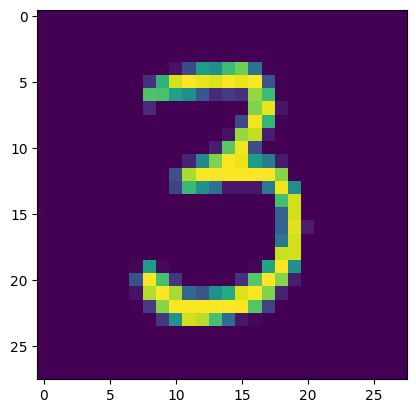

In [8]:
plt.imshow(x_train[50])
plt.show()

In [9]:
print(y_train[50])

3


In [10]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [11]:
print(np.unique(y_train))  # type of output number in train model

[0 1 2 3 4 5 6 7 8 9]


In [1]:
print(np.unique(y_test)) # type of output number in train model

NameError: name 'np' is not defined

we use these label as such or we can also apply one hot encoding

all images have same dimention, if not then we have to resize the dataset.

In [13]:
x_train = x_train / 255
x_test = x_test / 255

 0 / 255 = 0

 255 / 255 = 1

 ? / 255 = [0, 1] value lie in this interval

In [14]:
x_train[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

setup layer of NN

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid') 
])

complie mdl

In [16]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

training model

In [17]:
model.fit(x_train, y_train, epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3006 - accuracy: 0.9137
Epoch 2/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1454 - accuracy: 0.9567
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9679
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0837 - accuracy: 0.9739
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0698 - accuracy: 0.9782
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0607 - accuracy: 0.9809
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0529 - accuracy: 0.9828
Epoch 8/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 9/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0406 - accuracy: 0.9868
Epoch 10/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

train data accuracy : 98.8%

In [18]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0974 - accuracy: 0.9746
0.9746000170707703


test data accuracy : 97.5%

In [19]:
print(x_test.shape)

(10000, 28, 28)


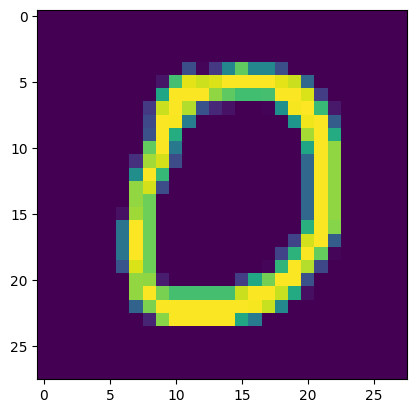

In [20]:
plt.imshow(x_test[10])

In [21]:
print(y_test[10])

0


In [22]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


model.pridict() give the prediction for all label and high label one will the answer

In [23]:
print(y_test.shape)

(10000,)


In [24]:
print(np.argmax(y_pred[10]))

0


y_test --> True label

y_pred_label --> predicted lebal

In [25]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 9, 9, 9, 5, 5, 1, 5, 6, 0, 2, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Lets build Confusion Metrix

In [26]:
con_mat = tf.math.confusion_matrix(y_test, y_pred_label)

In [27]:
print(con_mat)

tf.Tensor(
[[ 969    1    2    0    2    0    3    1    2    0]
 [   0 1121    4    0    0    2    3    1    4    0]
 [   1    2 1012    0    1    1    1    9    4    1]
 [   0    0    8  968    0   19    0    9    4    2]
 [   1    0    6    0  951    0    6    5    2   11]
 [   3    1    1    3    1  872    7    1    2    1]
 [   3    2    1    0    3    4  944    0    1    0]
 [   1    1    9    0    0    0    0 1011    4    2]
 [   4    0    8    4    5    7    7    6  929    4]
 [   3    2    0    7    3    7    2    9    7  969]], shape=(10, 10), dtype=int32)


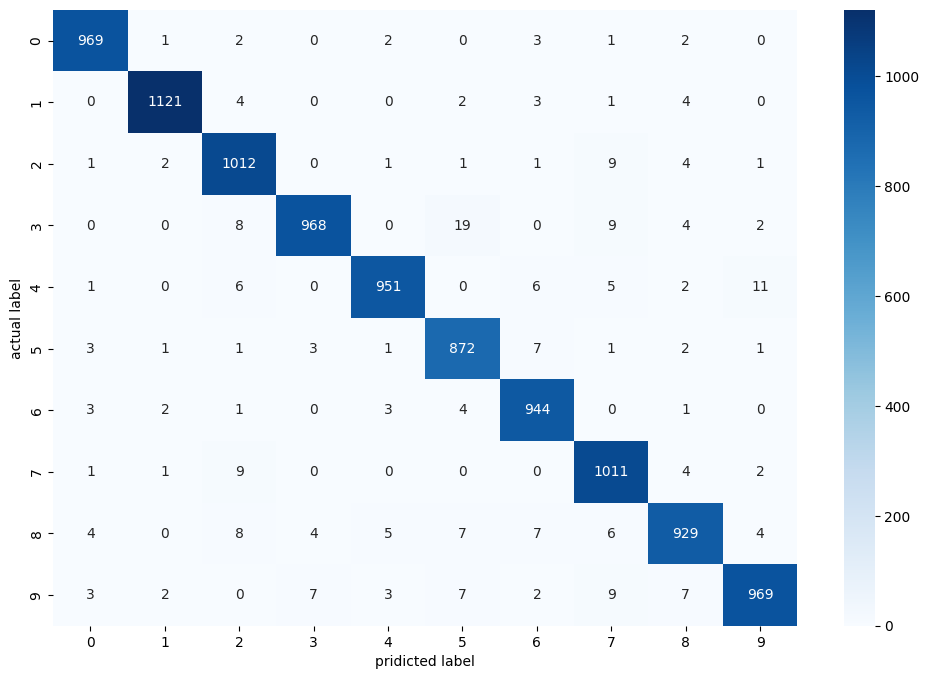

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('pridicted label')
plt.ylabel('actual label')
plt.show()

predictive system

In [29]:
input_image_path = 'sample.webp'
input_image = cv2.imread(input_image_path)

In [30]:
type(input_image)

numpy.ndarray

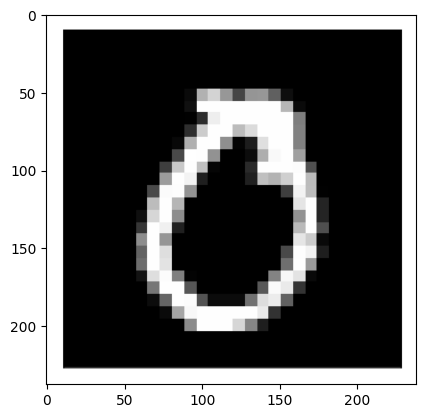

In [31]:
import matplotlib.image as mpimg
img = mpimg.imread(input_image_path)
img_plot = plt.imshow(img)
plt.show()

In [32]:
input_image.shape

(238, 238, 3)

In [33]:
greyscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
greyscale.shape

(238, 238)

In [35]:
input_image_resized = cv2.resize(greyscale, (28,28))

In [36]:
input_image_resized.shape

(28, 28)

In [37]:
# cv2.imwrite('resized.jpg', input_image_resized)

In [38]:
input_image_resized = input_image_resized / 255

In [39]:
# input_image_resized

without reshaping, array is 2D

In [40]:
image_reshape = np.reshape(input_image_resized, [1,28,28])
# image_reshape

after reshaping , array is 3D

In [41]:
input_prediction = model.predict(image_reshape)
print("The image is of", np.argmax(input_prediction))

1/1 [==============================] - 0s 24ms/step
The image is of 0


combined

In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as', input_pred_label, "of", input_image_path)

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


In [44]:
model.save('MODEL.keras')